### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"



loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

Dict_lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

loja1.head()

SyntaxError: invalid syntax (ipython-input-73-4138923843.py, line 4)

#1. Análise do faturamento


In [ ]:

for nome_loja, df in Dict_lojas.items():
    faturamento = df["Preço"].sum()

    print(f"\n📊 Loja: {nome_loja}")
    print(f"💰 Faturamento total: R$ {faturamento:,.2f}")



📊 Loja: Loja 1
💰 Faturamento total: R$ 1,534,509.12

📊 Loja: Loja 2
💰 Faturamento total: R$ 1,488,459.06

📊 Loja: Loja 3
💰 Faturamento total: R$ 1,464,025.03

📊 Loja: Loja 4
💰 Faturamento total: R$ 1,384,497.58


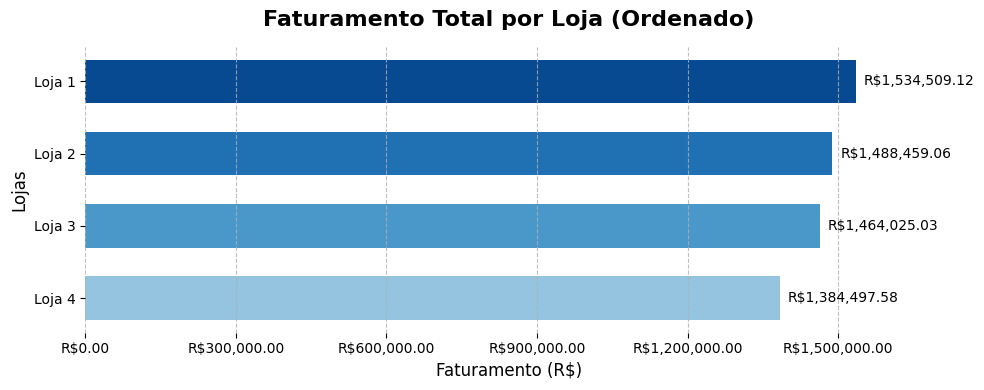

In [ ]:
#Variaveis de controle
lojas = []
faturamentos = []

for nome_loja, df in Dict_lojas.items():
    lojas.append(nome_loja)
    faturamentos.append(df['Preço'].sum())

dados_ordenados = sorted(zip(faturamentos, lojas), key=lambda x: x[0])
faturamentos_ordenados = [dado[0] for dado in dados_ordenados]
nomes_lojas_ordenados = [dado[1] for dado in dados_ordenados]


# Cores personalizadas
colors = plt.cm.Blues([0.4, 0.6, 0.75, 0.9])

# Criar figura
plt.figure(figsize=(10, 4))
bars = plt.barh(nomes_lojas_ordenados, faturamentos_ordenados, color=colors, height=0.6)

# Título e rótulos
plt.title("Faturamento Total por Loja (Ordenado)", fontsize=16, weight='bold', pad=15)
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)

# Formatação monetária no eixo X
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"R${x:,.2f}"))

# 👉 Define o intervalo do eixo X para ir de 3000,00 em 3000,00
plt.gca().xaxis.set_major_locator(MultipleLocator(300000))


# Inserir os valores nas barras
for bar in bars:
    # Pega o valor (comprimento da barra), que representa o faturamento da loja
    valor = bar.get_width()

    # Adiciona o texto (valor formatado em R$) no final de cada barra
    plt.text(
        valor + max(faturamentos_ordenados) * 0.01,  # Posição X: um pouco à frente da barra (1% do maior valor)
        bar.get_y() + bar.get_height() / 2,          # Posição Y: centralizado na altura da barra
        f"R${valor:,.2f}",                           # Texto: valor formatado como moeda
        va='center',                                 # Alinhamento vertical: centralizado
        ha='left',                                   # Alinhamento horizontal: alinhado à esquerda do texto
        fontsize=10                                  # Tamanho da fonte do texto
    )

# Estilo visual
plt.grid(axis='x', linestyle='--', alpha=0.8) #axis é a linha horizontal, linestyle a verticial e o alpha a opacidade
plt.box(False) #deleta o "fieldset" a borda da figura
plt.xlim(0, max(faturamentos_ordenados) * 1.10)
plt.tight_layout()

# Exibir
plt.show()


# 2. Vendas por Categoria


In [ ]:
for nome_loja, df in Dict_lojas.items():
    categorias = df["Categoria do Produto"].value_counts()

    print(f"\n📊 Loja: {nome_loja}")
    print(f"➕ Mais  vendas: {categorias.idxmax()} ({categorias.max()} unidades)")
    print(f"➖ Menos vendas: {categorias.idxmin()} ({categorias.min()} unidades)")


📊 Loja: Loja 1
➕ Mais  vendas: moveis (465 unidades)
➖ Menos vendas: utilidades domesticas (171 unidades)

📊 Loja: Loja 2
➕ Mais  vendas: moveis (442 unidades)
➖ Menos vendas: utilidades domesticas (181 unidades)

📊 Loja: Loja 3
➕ Mais  vendas: moveis (499 unidades)
➖ Menos vendas: instrumentos musicais (177 unidades)

📊 Loja: Loja 4
➕ Mais  vendas: moveis (480 unidades)
➖ Menos vendas: instrumentos musicais (170 unidades)


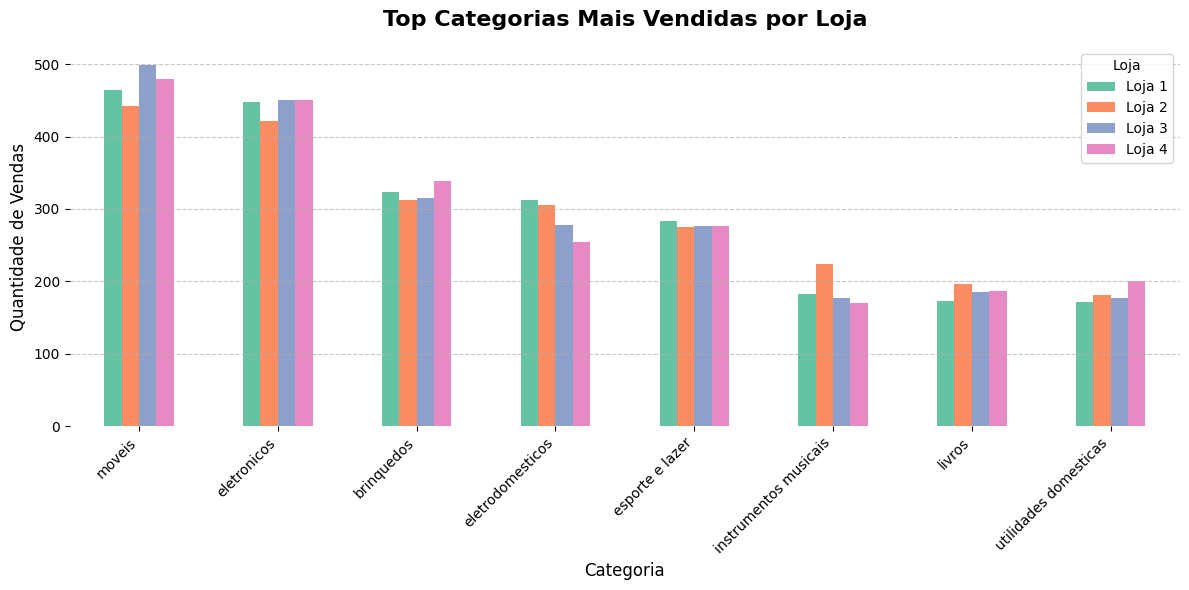

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Montar DataFrame com categorias por loja
tabela_categorias = pd.DataFrame()

for nome_loja, df in Dict_lojas.items():
    contagem = df['Categoria do Produto'].value_counts()
    tabela_categorias[nome_loja] = contagem

# Preencher valores ausentes com 0 e converter para int
tabela_categorias = tabela_categorias.fillna(0).astype(int)

# Adicionar coluna com total de vendas por categoria
tabela_categorias["Total"] = tabela_categorias.sum(axis=1)

# Ordenar pela soma total de vendas e pegar as 10 mais populares
top10_categorias = tabela_categorias.sort_values(by="Total", ascending=False).drop("Total", axis=1).head(10)

# Cores para cada loja (ajuste conforme o número de lojas)
cores = plt.cm.Set2.colors  # ou use uma paleta personalizada

# Plotando gráfico
ax = top10_categorias.plot(kind='bar', figsize=(12, 6), color=cores)

# Título e rótulos
plt.title("Top Categorias Mais Vendidas por Loja", fontsize=16, weight='bold', pad=15)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xlabel("Categoria", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Inserir valores acima das barras
# for container in ax.containers:
#     ax.bar_label(container, label_type='edge', fontsize=8)

# Estilo do eixo Y
ax.yaxis.set_major_locator(MultipleLocator(100))  # ou outro valor dependendo do volume de vendas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)
plt.tight_layout()
plt.legend(title="Loja")
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
for nome_loja, df in Dict_lojas.items():
    media_avaliacao = df["Avaliação da compra"].mean()

    print(f"\n📊 Loja: {nome_loja}")
    print(f"⭐ Média de avaliação: {media_avaliacao:.2f}")



📊 Loja: Loja 1
⭐ Média de avaliação: 3.98

📊 Loja: Loja 2
⭐ Média de avaliação: 4.04

📊 Loja: Loja 3
⭐ Média de avaliação: 4.05

📊 Loja: Loja 4
⭐ Média de avaliação: 4.00


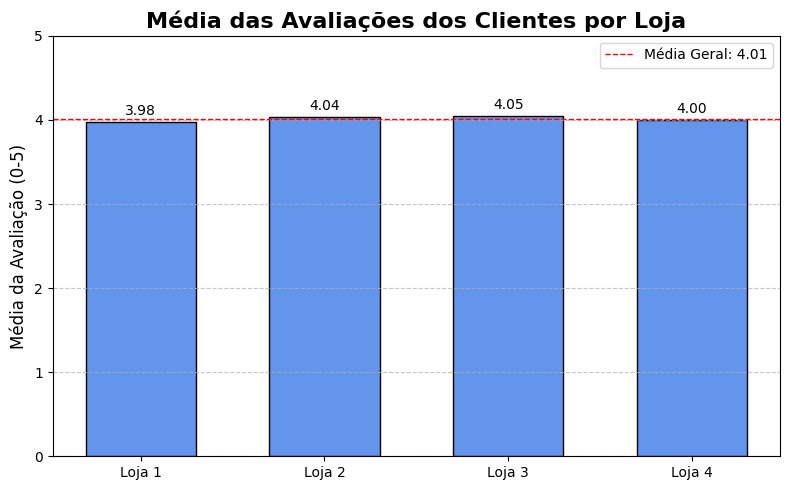

In [ ]:

# Exemplo: calcular médias por loja
media_avaliacoes = {}
for nome_loja, df in Dict_lojas.items():
    media_avaliacao = df["Avaliação da compra"].mean()
    media_avaliacoes[nome_loja] = media_avaliacao

# Preparar dados para o gráfico
lojas = list(media_avaliacoes.keys())
medias = list(media_avaliacoes.values())

# Calcular média geral de todas as lojas
media_geral = sum(medias) / len(medias)

plt.figure(figsize=(8, 5))
bars = plt.bar(lojas, medias, color='cornflowerblue', edgecolor='black', width=0.6)

plt.title("Média das Avaliações dos Clientes por Loja", fontsize=16, weight='bold')
plt.ylabel("Média da Avaliação (0-5)", fontsize=12)
plt.ylim(0, 5)  # Escala das avaliações de 0 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Linha horizontal da média geral
plt.axhline(media_geral, color='red', linestyle='--', linewidth=1, label=f'Média Geral: {media_geral:.2f}')

# Exibir valor da média em cima de cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.05,
             f"{altura:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
for nome, df in Dict_lojas.items():
    produtos = df["Produto"].value_counts()

    print(f"\n📊 Loja: {nome_loja}")
    print(f"➕ Produto mais vendido: {produtos.idxmax()} ({produtos.max()} unidades)")
    print(f"➖ Produto menos vendido: {produtos.idxmin()} ({produtos.min()} unidades)")


📊 Loja: Loja 4
➕ Produto mais vendido: Micro-ondas (60 unidades)
➖ Produto menos vendido: Headset (33 unidades)

📊 Loja: Loja 4
➕ Produto mais vendido: Iniciando em programação (65 unidades)
➖ Produto menos vendido: Jogo de tabuleiro (32 unidades)

📊 Loja: Loja 4
➕ Produto mais vendido: Kit banquetas (57 unidades)
➖ Produto menos vendido: Blocos de montar (35 unidades)

📊 Loja: Loja 4
➕ Produto mais vendido: Cama box (62 unidades)
➖ Produto menos vendido: Guitarra (33 unidades)


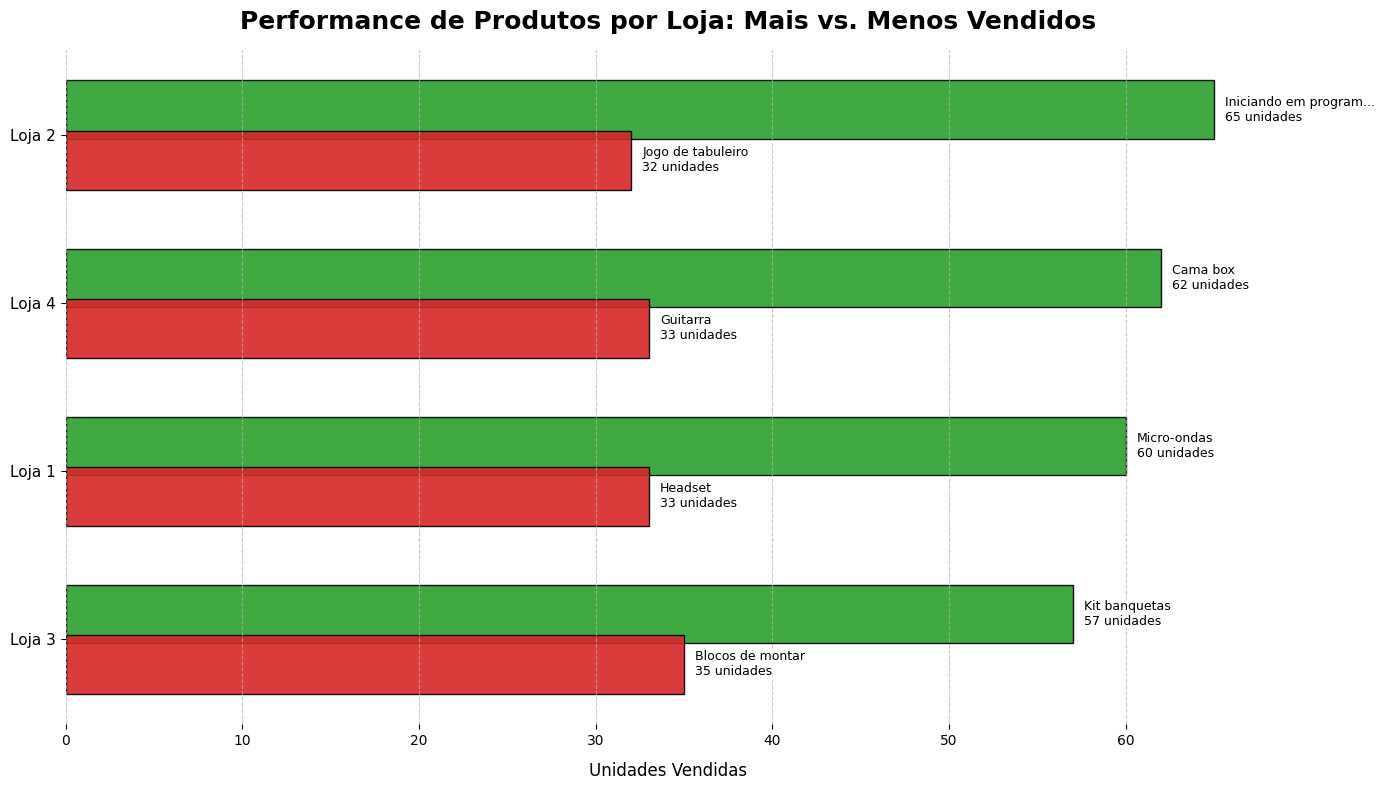

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Construir os dados de vendas
data = []
for nome, df in Dict_lojas.items():
    produtos = df["Produto"].value_counts()
    data.append({
        'Loja': nome,
        'Mais Vendido': produtos.idxmax(),
        'Qtd Mais': produtos.max(),
        'Menos Vendido': produtos.idxmin(),
        'Qtd Menos': produtos.min()
    })

df_plot = pd.DataFrame(data)

# Calcular diferença e ordenar
df_plot['Diferença'] = df_plot['Qtd Mais'] - df_plot['Qtd Menos']
df_plot = df_plot.sort_values('Diferença', ascending=False)

# Cores fixas
cor_mais = '#2ca02c'   # verde
cor_menos = '#d62728'  # vermelho

# Configurações iniciais do gráfico
plt.figure(figsize=(14, 8))
bar_height = 0.35
spacing = 0.15

# Eixo y manualmente com base na posição
lojas = df_plot['Loja'].tolist()
posicoes_y = list(range(len(lojas)))

# Barras do mais vendido
for i, (qtd, produto) in enumerate(zip(df_plot['Qtd Mais'], df_plot['Mais Vendido'])):
    plt.barh(posicoes_y[i] - spacing, qtd, height=bar_height, color=cor_mais, edgecolor='black', alpha=0.9)
    plt.text(qtd + max(df_plot['Qtd Mais'])*0.01, posicoes_y[i] - spacing,
             f"{produto[:20] + '...' if len(produto) > 20 else produto}\n{qtd} unidades",
             va='center', ha='left', fontsize=9,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=1))

# Barras do menos vendido
for i, (qtd, produto) in enumerate(zip(df_plot['Qtd Menos'], df_plot['Menos Vendido'])):
    plt.barh(posicoes_y[i] + spacing, qtd, height=bar_height, color=cor_menos, edgecolor='black', alpha=0.9)
    plt.text(qtd + max(df_plot['Qtd Mais'])*0.01, posicoes_y[i] + spacing,
             f"{produto[:20] + '...' if len(produto) > 20 else produto}\n{qtd} unidades",
             va='center', ha='left', fontsize=9,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=1))
# Configuração do eixo Y
plt.yticks(posicoes_y, lojas, fontsize=11)
plt.gca().invert_yaxis()  # Loja mais vendida no topo
plt.xlabel('Unidades Vendidas', fontsize=12, labelpad=10)
plt.title('Performance de Produtos por Loja: Mais vs. Menos Vendidos',
          fontsize=18, pad=15, fontweight='bold')

# Estilo visual
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.box(False)
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [ ]:
for nome_loja, df in Dict_lojas.items():
    frete_medio = df["Frete"].mean()

    print(f"\n📊 Loja: {nome_loja}")
    print(f"🚚 Frete médio: R$ {frete_medio:.2f}")


📊 Loja: Loja 1
🚚 Frete médio: R$ 34.69

📊 Loja: Loja 2
🚚 Frete médio: R$ 33.62

📊 Loja: Loja 3
🚚 Frete médio: R$ 33.07

📊 Loja: Loja 4
🚚 Frete médio: R$ 31.28


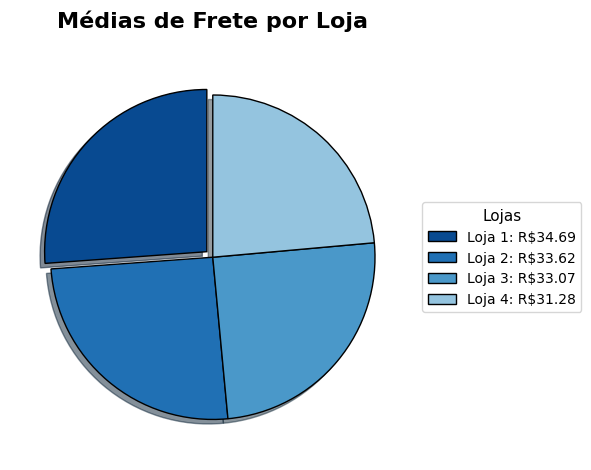

In [ ]:
import matplotlib.pyplot as plt

# Preparar dados
lojas = []
medias = []

for nome, df in Dict_lojas.items():
    frete_media = df["Frete"].mean()
    lojas.append(nome)
    medias.append(frete_media)

# Cores suaves no estilo usado anteriormente
colors = plt.cm.Blues([0.4, 0.6, 0.75, 0.9][::-1])


# Explode a maior fatia para destacar
explode = [0.05 if v == max(medias) else 0 for v in medias]

# Criação do gráfico
plt.figure(figsize=(6, 6))

# Gráfico de pizza
wedges, texts = plt.pie(
    medias,
    labels=None,
    colors=colors,
    explode=explode,
    startangle=90,
    shadow=True,
    wedgeprops=dict(edgecolor='black'),
    textprops={'fontsize': 12}
)


# Título estilizado
plt.title('Médias de Frete por Loja', fontsize=16, pad=20, fontweight='bold')

# Criar legenda com nome da loja + valor do frete médio
legendas = [f"{loja}: R${media:.2f}" for loja, media in zip(lojas, medias)]
plt.legend(wedges, legendas, title="Lojas", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

📊 Relatório de Eficiência das Lojas – Alura Store
🧾 Introdução
Este relatório tem como objetivo apoiar a decisão do Sr. João sobre qual loja da Alura Store vender, com base em indicadores de desempenho como faturamento, volume de vendas por categoria, avaliação dos clientes, frete médio e produtos mais vendidos.

📌 Resumo dos Indicadores por Loja
Loja	💰 Faturamento	⭐ Avaliação Média	🚚 Frete Médio	🛒 Categoria + Vendida	🛒 Categoria - Vendida
Loja 1	R$ 1.534.509,12	3.98	R$ 34,69	Móveis (465)	Utilidades (171)
Loja 2	R$ 1.488.459,06	4.04	R$ 33,62	Móveis (442)	Utilidades (181)
Loja 3	R$ 1.464.025,03	4.05	R$ 33,07	Móveis (499)	Instrumentos (177)
Loja 4	R$ 1.384.497,58	4.00	R$ 31,28	Móveis (480)	Instrumentos (170)

🏪 Análise Individual das Lojas
🔹 Loja 1
Faturamento: 💰 Maior entre as quatro lojas.

Avaliação: ⭐ Mais baixa (3.98), possível sinal de insatisfação do cliente.

Frete: 🚚 Mais caro (R$ 34,69).

Pontos fortes: Alto volume de vendas e faturamento.

Pontos fracos: Atendimento ou qualidade podem ser problema (nota abaixo de 4), frete elevado.

🔎 Observação: Apesar de faturar mais, a insatisfação dos clientes pode afetar a sustentabilidade no longo prazo.

🔹 Loja 2
Faturamento: 💰 Segundo maior.

Avaliação: ⭐ 4.04 (muito boa).

Frete: 🚚 R$ 33,62 (intermediário).

Pontos fortes: Bom equilíbrio entre avaliação e faturamento.

Pontos fracos: Categoria menos vendida também é baixa (utilidades).

🔎 Observação: Loja com desempenho estável e equilibrado. Sem pontos críticos.

🔹 Loja 3
Faturamento: 💰 Terceiro lugar.

Avaliação: ⭐ Melhor média (4.05).

Frete: 🚚 R$ 33,07.

Pontos fortes: Excelente avaliação de clientes, maior número de vendas em móveis.

Pontos fracos: Baixo faturamento pode ser um reflexo de margens menores ou produtos com preço mais baixo.

🔎 Observação: Loja muito bem avaliada, pode ter bom potencial de fidelização de clientes.

🔹 Loja 4
Faturamento: 💰 Mais baixo (R$ 1.384.497,58).

Avaliação: ⭐ 4.00 (ok, mas não destaque).

Frete: 🚚 Melhor valor (R$ 31,28).

Pontos fortes: Logística eficiente (frete mais barato).

Pontos fracos: Faturamento fraco, produtos menos vendidos em diversas categorias, ausência de destaque claro.

🔎 Observação: Loja mais fraca no desempenho geral. Boa logística, mas vendas baixas e pouco destaque.

🏆 Ranking Geral
Posição	Loja	Justificativa
🥇 1º	Loja 3	Melhor avaliação de clientes, boa logística, maior volume em móveis.
🥈 2º	Loja 2	Boa nota e faturamento. Loja equilibrada.
🥉 3º	Loja 1	Maior faturamento, mas problemas claros em avaliação e frete.
❌ 4º	Loja 4	Pior desempenho geral em faturamento, produtos vendidos e sem diferencial forte.

✅ Recomendação Final
Com base em todas as análises, recomendamos que o Sr. João venda a Loja 4.
Apesar de apresentar o menor frete médio, ela é a loja com menor faturamento, sem destaque em avaliação e baixo volume de vendas em produtos e categorias importantes.

Essa loja representa a menor eficiência operacional e comercial da rede, e sua venda poderia liberar recursos para investir nas demais, especialmente na Loja 3, que tem maior aprovação dos clientes e potencial de crescimento.






# 6. Relatório


# 📊 Relatório de Eficiência das Lojas – Alura Store

## 🧾 Introdução

Este relatório tem como objetivo apoiar a decisão do Sr. João sobre **qual loja da Alura Store vender**, com base em indicadores de desempenho como **faturamento**, **volume de vendas por categoria**, **avaliação dos clientes**, **frete médio** e **produtos mais vendidos**.

---

## 📌 Resumo dos Indicadores por Loja


| Loja   | 💰 Faturamento   | ⭐ Avaliação Média | 🚚 Frete Médio | 🛒 Categoria + Vendida | 🛒 Categoria - Vendida |
| ------ | ---------------- | ----------------- | -------------- | ---------------------- | ---------------------- |
| Loja 1 | R\$ 1.534.509,12 | 3.98              | R\$ 34,69      | Móveis (465)           | Utilidades (171)       |
| Loja 2 | R\$ 1.488.459,06 | 4.04              | R\$ 33,62      | Móveis (442)           | Utilidades (181)       |
| Loja 3 | R\$ 1.464.025,03 | 4.05              | R\$ 33,07      | Móveis (499)           | Instrumentos (177)     |
| Loja 4 | R\$ 1.384.497,58 | 4.00              | R\$ 31,28      | Móveis (480)           | Instrumentos (170)     |


---

## 🏪 Análise Individual das Lojas

### 🔹 Loja 1
- **Faturamento:** 💰 Maior entre as quatro lojas.
- **Avaliação:** ⭐ Mais baixa (3.98), possível sinal de insatisfação do cliente.
- **Frete:** 🚚 Mais caro (R$ 34,69).
- **Pontos fortes:** Alto volume de vendas e faturamento.
- **Pontos fracos:** Avaliação abaixo de 4 e frete elevado.

> 🔎 **Observação:** Apesar do bom faturamento, a insatisfação dos clientes pode afetar a loja no longo prazo.

---

### 🔹 Loja 2
- **Faturamento:** 💰 Segundo maior.
- **Avaliação:** ⭐ 4.04 (muito boa).
- **Frete:** 🚚 R$ 33,62.
- **Pontos fortes:** Equilíbrio entre avaliação e faturamento.
- **Pontos fracos:** Categoria menos vendida também está baixa (utilidades).

> 🔎 **Observação:** Loja estável, sem pontos críticos. Potencial confiável.

---

### 🔹 Loja 3
- **Faturamento:** 💰 Terceiro lugar.
- **Avaliação:** ⭐ Melhor média (4.05).
- **Frete:** 🚚 R$ 33,07.
- **Pontos fortes:** Excelente avaliação dos clientes, maior volume de vendas em móveis.
- **Pontos fracos:** Faturamento um pouco abaixo, possivelmente por ticket médio menor.

> 🔎 **Observação:** Loja com bom potencial de fidelização de clientes.

---

### 🔹 Loja 4
- **Faturamento:** 💰 Mais baixo (R\$ 1.384.497,58.)
- **Avaliação:** ⭐ 4.00.
- **Frete:** 🚚 Melhor valor (R$ 31,28).
- **Pontos fortes:** Logística eficiente.
- **Pontos fracos:** Baixo faturamento, produtos menos vendidos em diversas categorias, sem destaque.

> 🔎 **Observação:** Loja com o pior desempenho geral.

---

## 🏆 Ranking Geral


🥇 1º   | Loja 3  | Melhor avaliação de clientes, boa logística, maior volume em móveis.
    
🥈 2º   | Loja 2  | Boa nota e faturamento. Loja equilibrada.

🥉 3º   | Loja 1  | Maior faturamento, mas avaliação baixa e frete alto.  
                         
❌ 4º   | Loja 4  | Pior desempenho geral, sem destaque, menor faturamento e volume de vendas.     


---

## ✅ Recomendação Final

Com base em todas as análises, **recomendamos que o Sr. João venda a Loja 4**.

Apesar de apresentar o menor frete médio, ela é a **loja com menor faturamento**, **sem destaque em avaliação** e **baixa performance em produtos e categorias relevantes**.

Essa loja representa a **menor eficiência operacional e comercial da rede**, e sua venda permitiria direcionar esforços e recursos para lojas com mais potencial, especialmente a **Loja 3**, que lidera em avaliação e performance de vendas em móveis.

---

